# To Explore Decision Tree Algorithm

# Author: Piyali_Dey.
Copyright Piyali_Dey,2021

In [1]:
#Importing libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.metrics import roc_curve,auc,f1_score

In [3]:
plt.rcParams['figure.figsize']=(10,7)

# importing data sets

In [5]:
df_iris=pd.read_csv('Iris.csv')

In [6]:
df_iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
df_iris.shape

(150, 6)

In [8]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
df_iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [10]:
df_iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [11]:
# separte catagorical column and numerical column

In [12]:
df_num=df_iris.select_dtypes(np.number)

In [13]:
df_o=df_iris.select_dtypes('O')

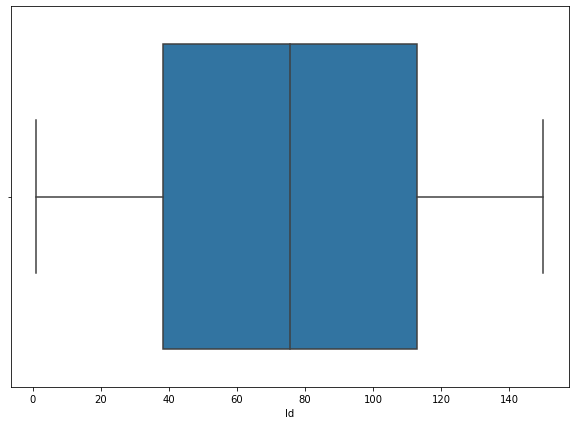

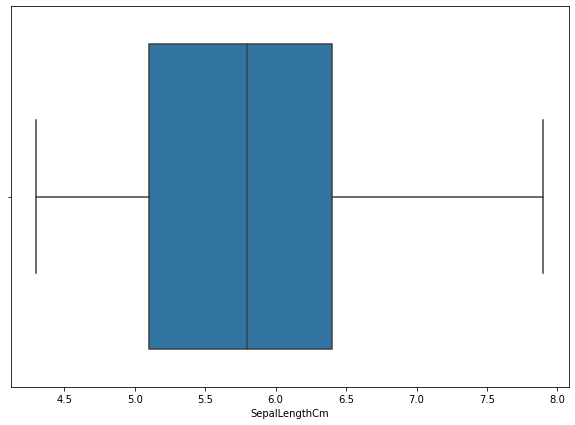

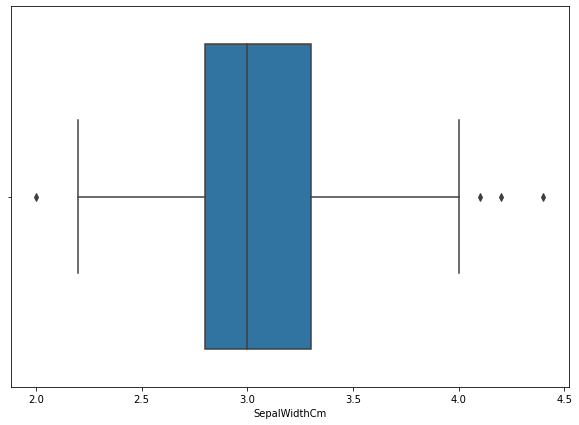

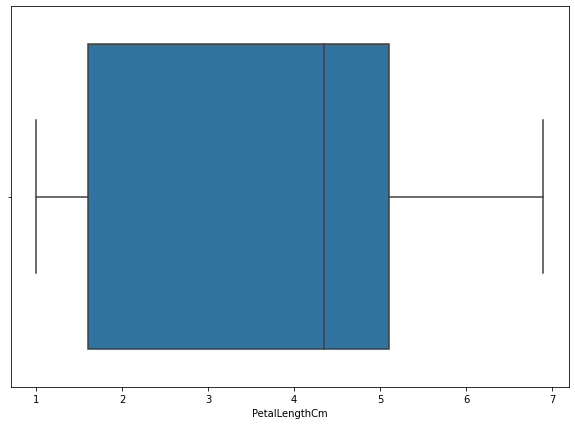

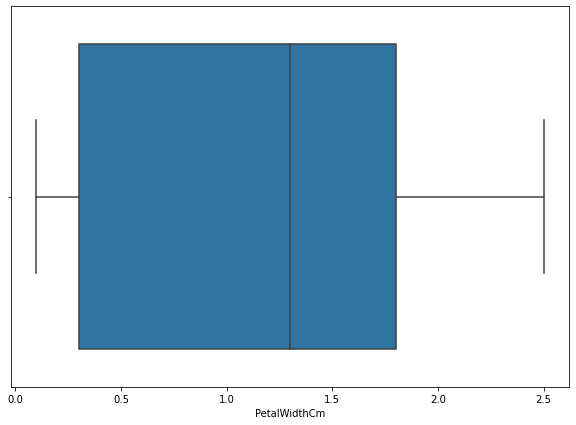

In [14]:
for i in df_num.columns:
    sns.boxplot(df_num[i])
    plt.show()

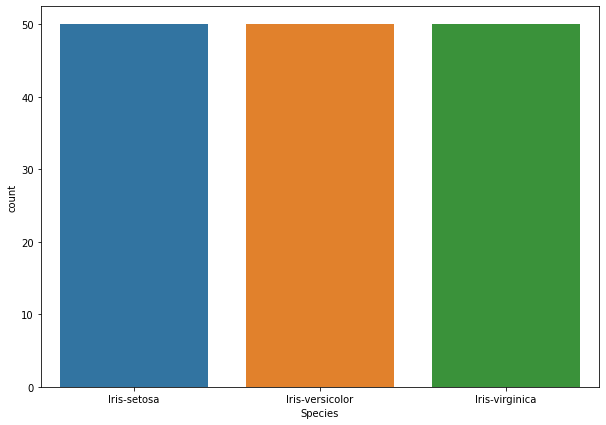

In [15]:
for i in df_o.columns:
    sns.countplot(df_o[i])
    plt.show()

# Label Encoding

In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_iris['Species']=le.fit_transform(df_iris['Species'])
df_iris['Species'].value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

In [17]:
df_iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [18]:
(df_iris['Species']).unique()

array([0, 1, 2])

In [19]:
x_drop=df_iris.drop(['Species'],axis=1)

In [20]:
from sklearn.preprocessing import StandardScaler,PowerTransformer

In [21]:
sds=StandardScaler()
df_scale=pd.DataFrame(sds.fit_transform(df_iris),columns=df_iris.columns)

# split dataset into train and test sets

In [22]:
x=df_scale
y=df_iris.Species
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

# Now let us define the Decision Tree Algorithm

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [25]:
dtc=DecisionTreeClassifier()
model_mid=dtc.fit(x_train,y_train)
ypred_tarin_mid=model_mid.predict(x_train)
ypred_test_mid=model_mid.predict(x_test)

In [26]:
print('model accuarcy on tarining set',round(accuracy_score(y_train,ypred_tarin_mid),3))
print('model accuarcy on test set',round(accuracy_score(y_test,ypred_test_mid),3))

model accuarcy on tarining set 1.0
model accuarcy on test set 1.0


In [27]:
print(classification_report(y_test,ypred_test_mid))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        14

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [28]:
cfm=confusion_matrix(y_test,ypred_test_mid)
precission_s=cfm[1,1]/(cfm[1,1]+cfm[1,0])
precission_s

1.0

In [29]:
dtc=DecisionTreeClassifier()

In [30]:
from sklearn.model_selection import GridSearchCV
tune_params={'criterion':['gini','entropy'],
                'max_depth':[2,3,4,5,6,7,8,9,10]}
grid_tune= GridSearchCV(dtc,param_grid=tune_params,cv=5,scoring='f1_weighted')
grid_modl=grid_tune.fit(x_train,y_train)
grid_modl.best_params_

{'criterion': 'gini', 'max_depth': 7}

In [31]:
dt_slc=DecisionTreeClassifier(criterion='gini',max_depth=3)
tune_slc_modl=dt_slc.fit(x_train,y_train)
y_pred_train_tune=tune_slc_modl.predict(x_train)
y_pred_test_tune=tune_slc_modl.predict(x_test)

In [32]:
print('accuracy_train',(accuracy_score(y_train,ypred_tarin_mid)))
print('accuracy_test',(accuracy_score(y_test,ypred_test_mid)))

accuracy_train 1.0
accuracy_test 1.0


In [33]:
print(classification_report(y_test,ypred_test_mid))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        14

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [34]:
from sklearn import tree

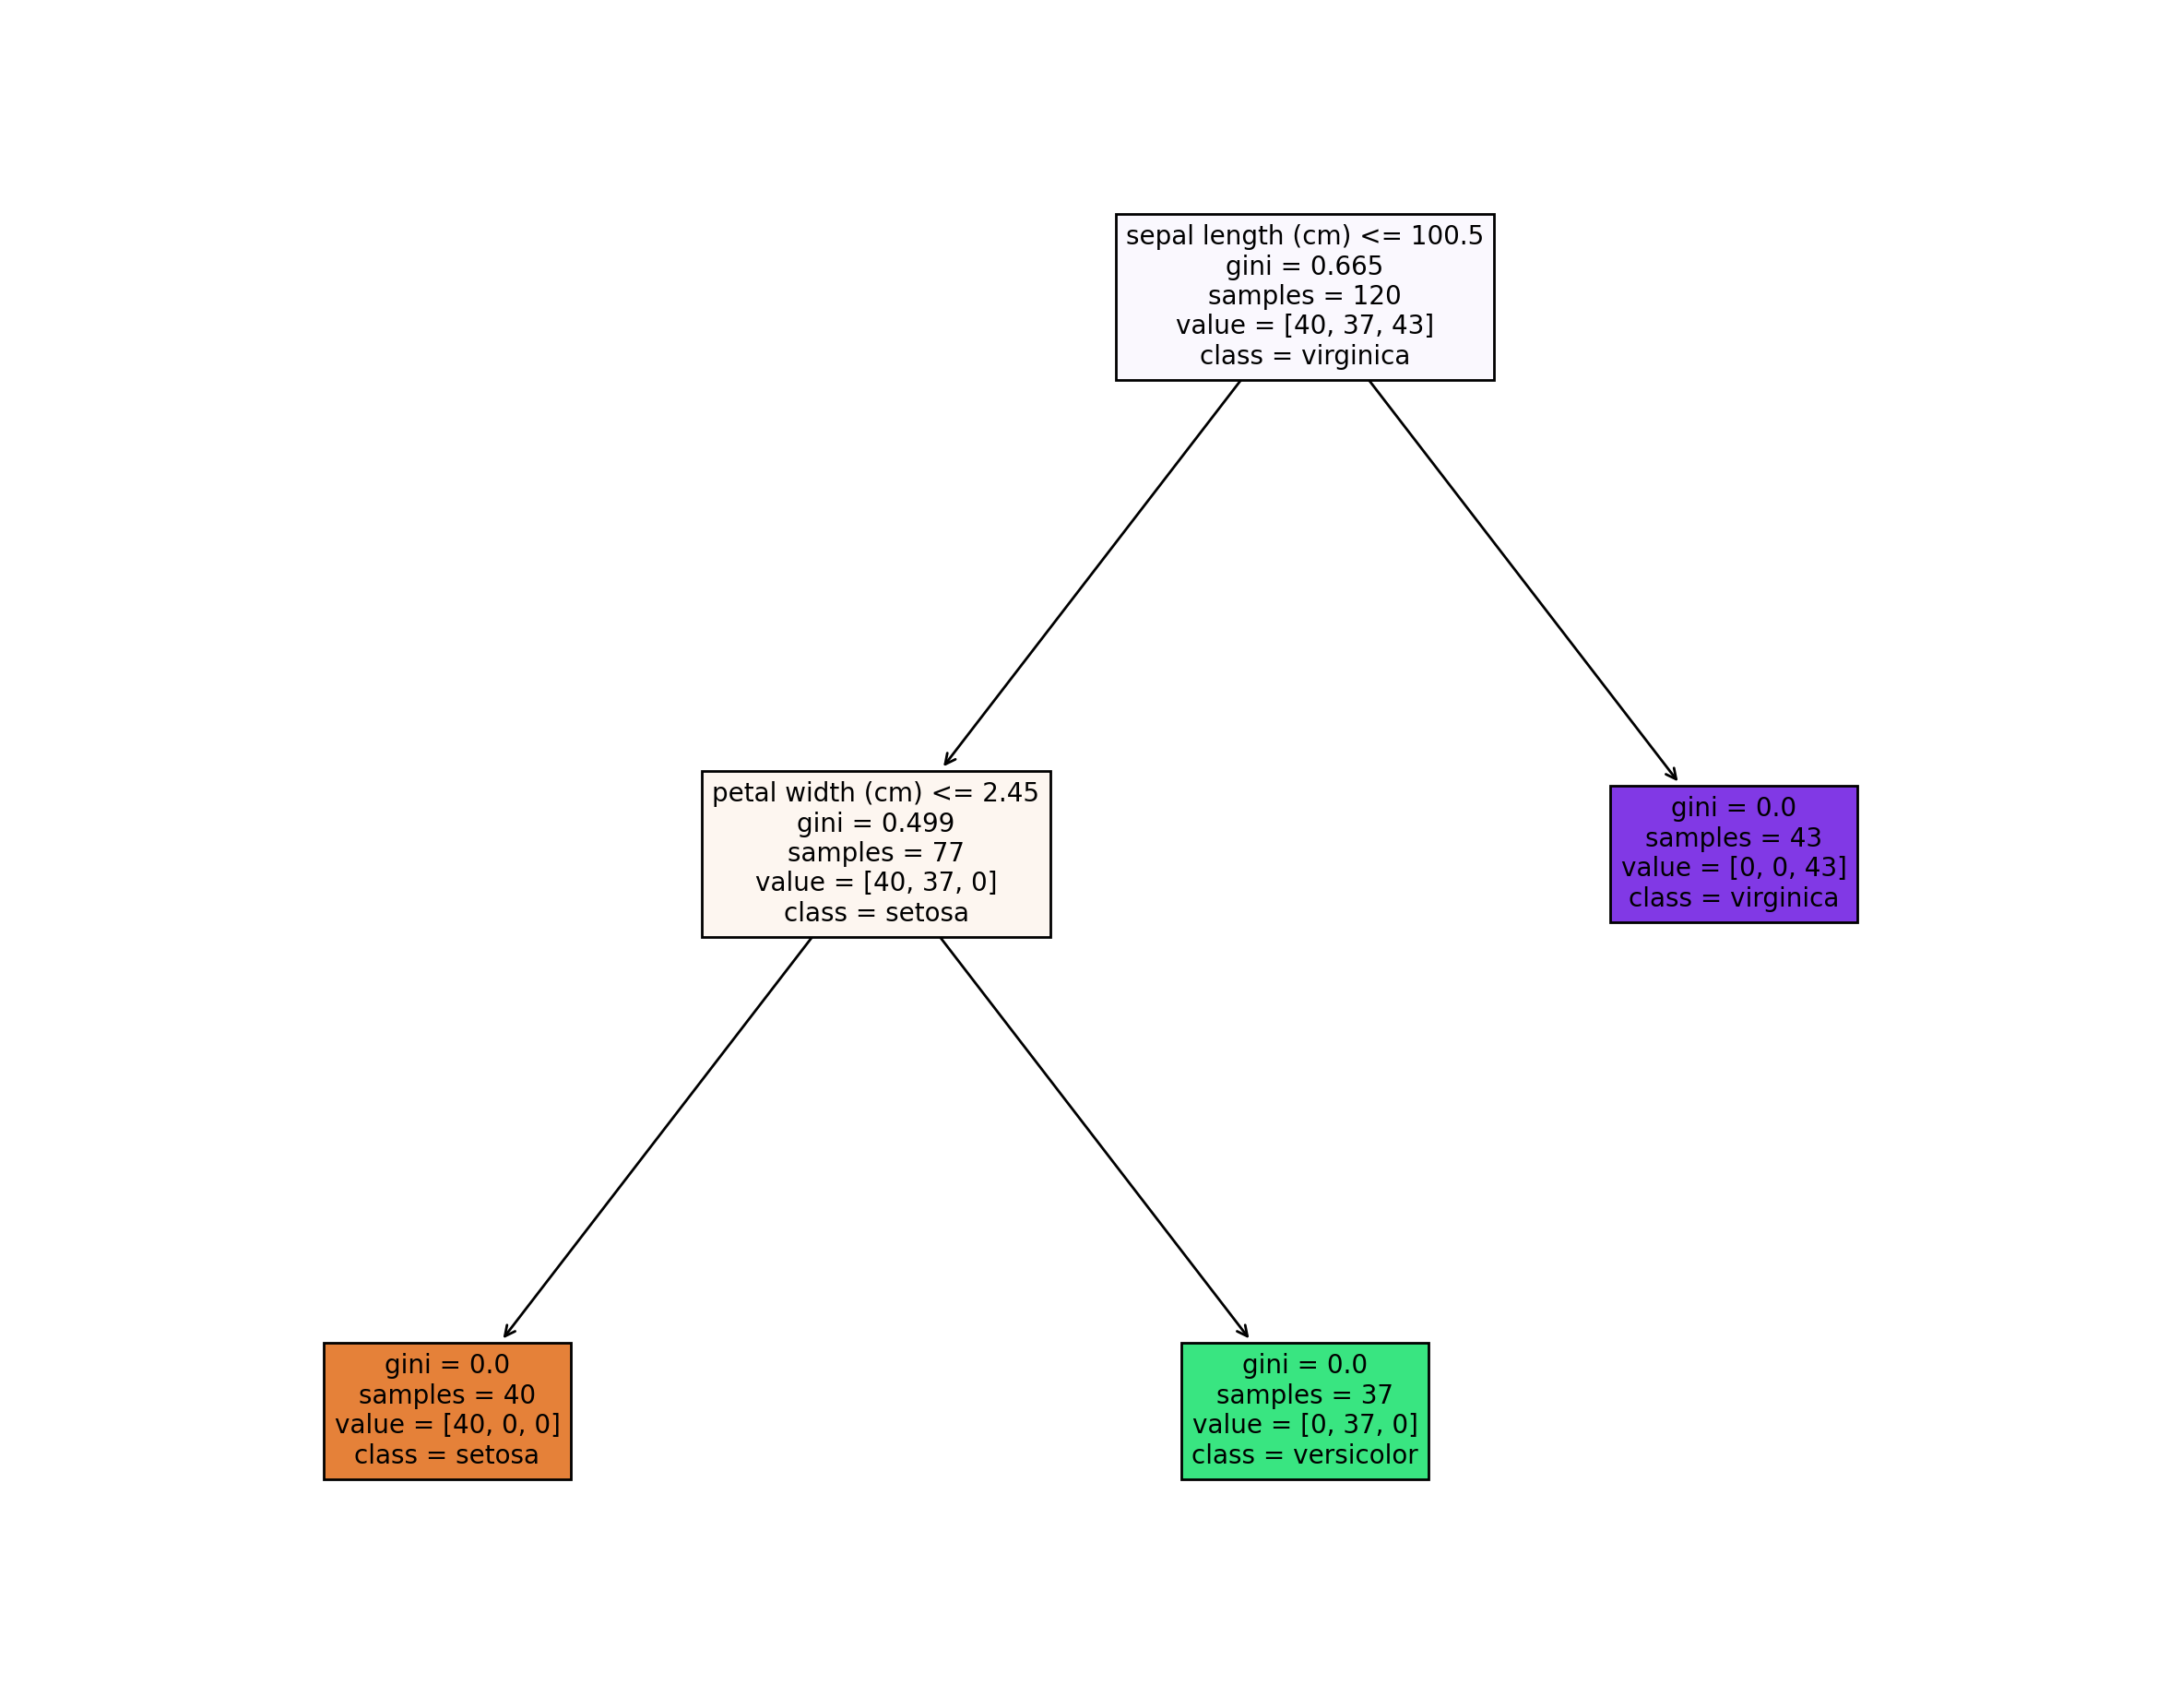

In [35]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa','versicolor','virginica']

plt.rcParams['figure.figsize']=(15,12)
x = df_iris.drop('Species',axis=1)
y = df_iris.Species
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)
dt = DecisionTreeClassifier(max_leaf_nodes=5)
model = dt.fit(x_train,y_train)
ypred = model.predict(x_test)
fig, axes = plt.subplots(nrows = 1, ncols = 1,dpi = 200)
tree.plot_tree(model,fontsize=10,feature_names=fn,class_names=cn,filled = True)
plt.show()
